#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)


Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [16]:
model = Sequential()

In [17]:
#卷積層1
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model.add(Dropout(rate=0.2))
#MaxPolling2D: 將輸入切割成每組2x2的大小，每組取1個Max值，用來降低資料輸入個數
model.add(MaxPooling2D(pool_size=(2, 2),data_format='channels_last')) 

In [18]:
#卷積層2與池化層2
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2), data_format='channels_last'))


In [19]:
#建立神經網路(平坦層、隱藏層、輸出層)
model.add(Flatten())
model.add(Dropout(rate=0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=0.2))


In [20]:
#輸出層
model.add(Dense(10, activation='softmax'))

In [21]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [22]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 作業:
## 請分別選用 "MSE", "binary _crossentropy"
## 查看Train/test accurancy and loss rate

# 訓練模型1 :  loss = mean_squared_error

In [23]:
# loss = mean_squared_error
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
#模型編譯
#model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [24]:
#為了解決 model.fix 當掉問題
#（OMP: Error #15: Initializing libiomp5.dylib, but found libiomp5.dylib already initialized.）
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [26]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=32, verbose=1)         

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 4164s 104ms/step - loss: 0.0901 - acc: 0.1129 - val_loss: 0.0898 - val_acc: 0.1335
Epoch 2/10
40000/40000 [==============================] - 3946s 99ms/step - loss: 0.0897 - acc: 0.1298 - val_loss: 0.0896 - val_acc: 0.1743
Epoch 3/10
40000/40000 [==============================] - 3949s 99ms/step - loss: 0.0895 - acc: 0.1473 - val_loss: 0.0895 - val_acc: 0.1979
Epoch 4/10
40000/40000 [==============================] - 3946s 99ms/step - loss: 0.0893 - acc: 0.1585 - val_loss: 0.0893 - val_acc: 0.2068
Epoch 5/10
40000/40000 [==============================] - 3945s 99ms/step - loss: 0.0890 - acc: 0.1684 - val_loss: 0.0891 - val_acc: 0.2198
Epoch 6/10
40000/40000 [==============================] - 3947s 99ms/step - loss: 0.0888 - acc: 0.1771 - val_loss: 0.0888 - val_acc: 0.2333
Epoch 7/10
40000/40000 [==============================] - 3944s 99ms/step - loss: 0.0884 - acc: 0.1883 - val_

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
#定義一個繪圖函數
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()


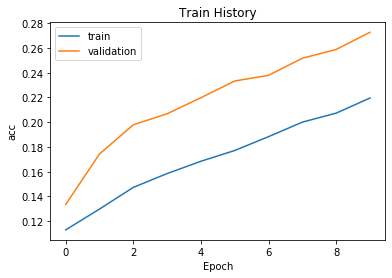

In [32]:
show_train_history(train_history,'acc','val_acc')

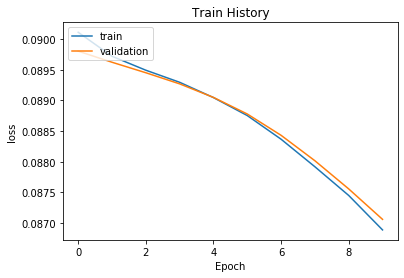

In [33]:
show_train_history(train_history,'loss','val_loss')

In [34]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 428s 43ms/step

accuracy= 0.9000700359344482


# 訓練模型2 :  loss = binary_crossentropy

In [35]:
# loss = mean_squared_error
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
#模型編譯
#model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [36]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=32, verbose=1)         

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 3972s 99ms/step - loss: 0.2809 - acc: 0.9010 - val_loss: 0.2810 - val_acc: 0.9000
Epoch 2/10
40000/40000 [==============================] - 4063s 102ms/step - loss: 0.2748 - acc: 0.9016 - val_loss: 0.2762 - val_acc: 0.9001
Epoch 3/10
40000/40000 [==============================] - 3951s 99ms/step - loss: 0.2693 - acc: 0.9023 - val_loss: 0.2692 - val_acc: 0.9006
Epoch 4/10
40000/40000 [==============================] - 3951s 99ms/step - loss: 0.2644 - acc: 0.9031 - val_loss: 0.2649 - val_acc: 0.9008
Epoch 5/10
40000/40000 [==============================] - 3946s 99ms/step - loss: 0.2605 - acc: 0.9037 - val_loss: 0.2618 - val_acc: 0.9012
Epoch 6/10
40000/40000 [==============================] - 3946s 99ms/step - loss: 0.2560 - acc: 0.9047 - val_loss: 0.2568 - val_acc: 0.9017
Epoch 7/10
40000/40000 [==============================] - 3949s 99ms/step - loss: 0.2530 - acc: 0.9050 - val_

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()


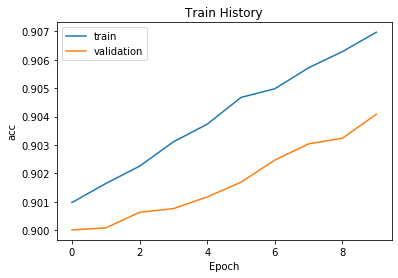

In [38]:
show_train_history(train_history,'acc','val_acc')

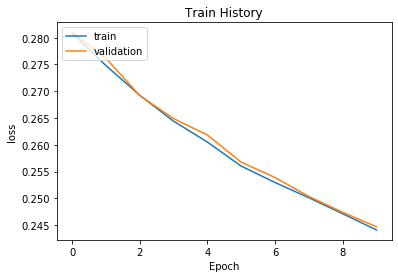

In [39]:
show_train_history(train_history,'loss','val_loss')

In [40]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 419s 42ms/step

accuracy= 0.904170027923584
